In [1]:
# random forestで来客予測
import numpy as np
from pandas import DataFrame
import pandas as pd
from sklearn.metrics import mean_absolute_error as mae
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import *
import statsmodels.api as sm



In [7]:
#import data 
df = pd.read_csv('/Users/thakgatsomanthata/Downloads/CustomerNumberHistory.csv')


# df = df.iloc[: , :-1]
# df.index.name = "ds"
df.columns = ["ds","y"]
df["Time_stamp"] = pd.to_datetime(df["ds"],yearfirst= True, infer_datetime_format= True, exact= True)
df = df.set_index("Time_stamp")
df = df.drop("ds", axis=1)
# df["ds"] = pd.to_datetime(df["ds"]).dt.day
# df["Month"] = pd.to_datetime(df["ds"]).dt.month
df=df[df!=0].dropna()
df =df[df!=1].dropna()
# df=df[df<=1000].dropna()

In [10]:
#The day of the week with Monday=0, Sunday=6
df['day'] = df.index.dayofweek
df['month'] = df.index.month
df['year'] = df.index.year

In [11]:
df

,y,day,month,year
Time_stamp,,,,
2018-01-03,853.0,2,1,2018
2018-01-04,765.0,3,1,2018
2018-01-05,531.0,4,1,2018
2018-01-06,632.0,5,1,2018
2018-01-07,884.0,6,1,2018
...,...,...,...,...
2021-06-09,75.0,2,6,2021
2021-06-10,98.0,3,6,2021
2021-06-11,93.0,4,6,2021


In [77]:
feature1 = df["day"].to_numpy()
feature2 = df["month"].to_numpy()
feature3 = df["year"].to_numpy()

In [82]:
feat_labels = ["day", "month", "year"]

In [78]:
features = []

for i in range(len(feature1)):
    feature = [feature1[i],feature2[i],feature3[i]]
    features.append(feature)


In [80]:
X = np.array(features)
y = df["y"].to_numpy()

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [83]:
#Train the random forest model 
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor()

In [95]:
feature_plot = pd.DataFrame(model.feature_importances_)


<AxesSubplot:>

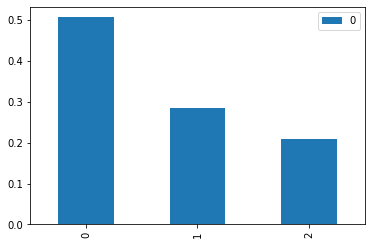

In [98]:
feature_plot.plot.bar()

In [99]:
yhat = model.predict(X_test)

In [101]:
data = list(zip(y_test, yhat))

In [116]:
results = pd.DataFrame(data)
results.columns = ["random forest", "ground truth"]

Text(0, 0.5, 'Customer count')

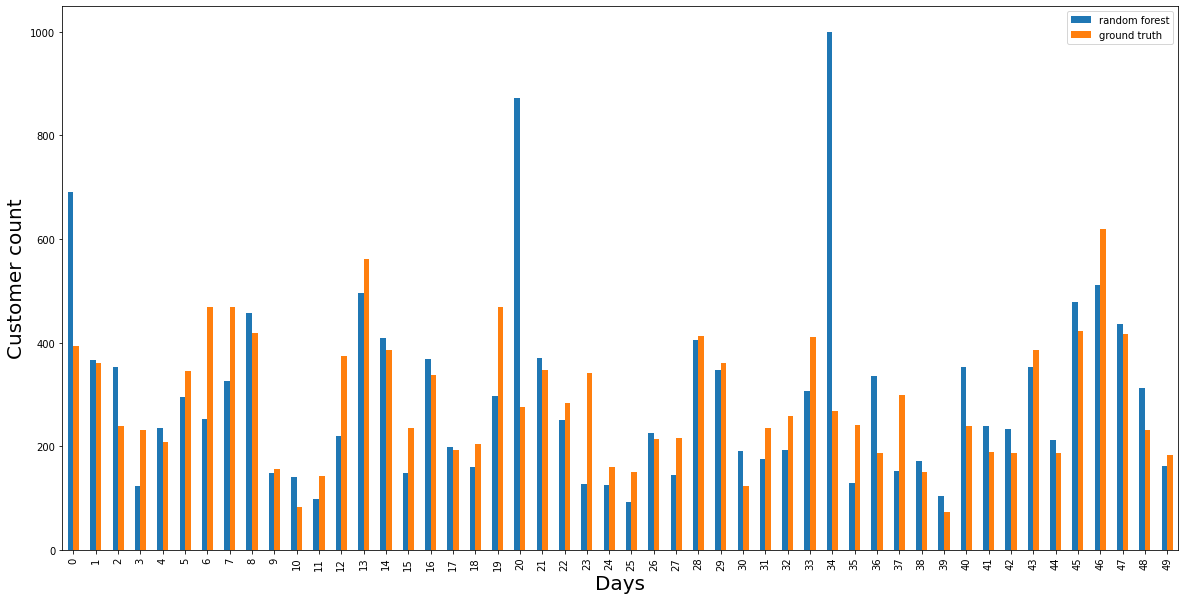

In [117]:
results[0:50].plot.bar(figsize = (20, 10))
plt.xlabel("Days", fontsize=20)
plt.ylabel("Customer count", fontsize=20)

In [109]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [111]:
100 - MAPE(y_test, yhat )

64.84441229257109